In [5]:
import torch
import cv2
from LeNet5 import LeNet5
from torchvision.transforms import ToTensor, ToPILImage
from torchvision import transforms
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [20]:
for file in os.listdir('./test_imgs/raw/'):
    pic = cv2.imread('./test_imgs/raw/'+file, cv2.IMREAD_COLOR)
    pic_n = cv2.resize(pic, (28, 28))
#     print('./test_imgs/'+file.split('.')[0]+'.png')
    cv2.imwrite('./test_imgs/'+file, pic_n)

In [21]:
net = LeNet5()
net.load_state_dict(torch.load('./models/lenet_0.988.pt'))

<All keys matched successfully>

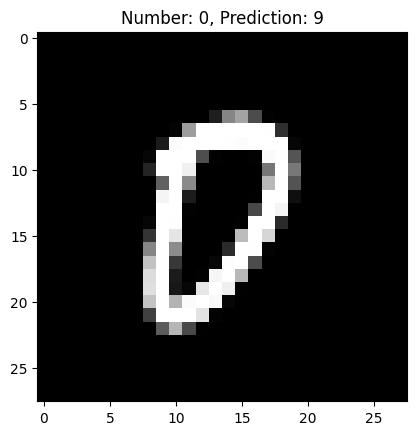

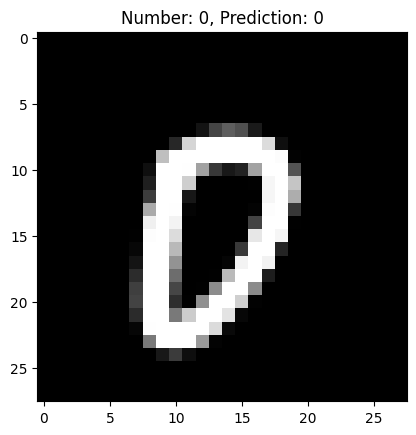

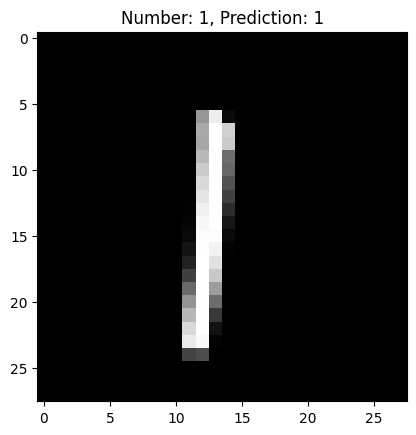

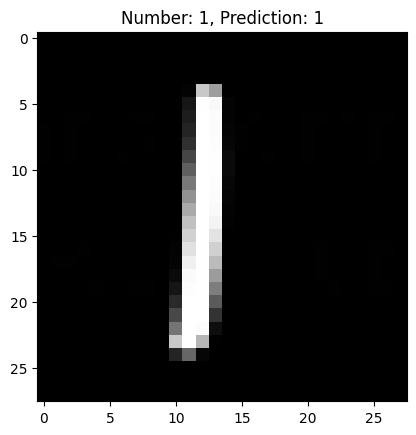

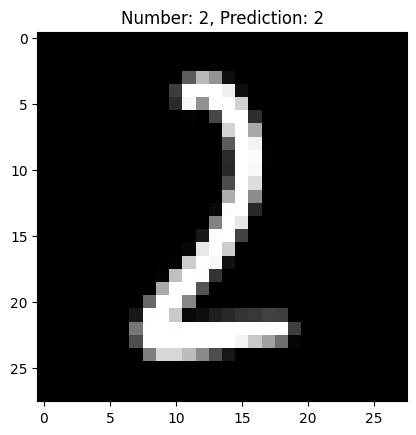

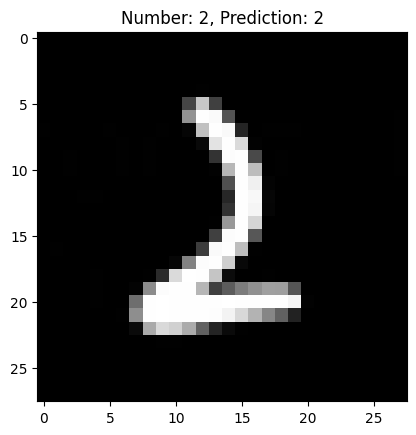

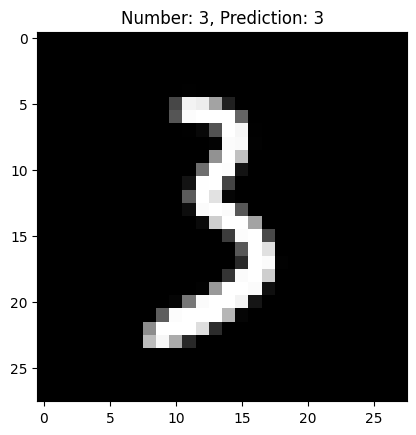

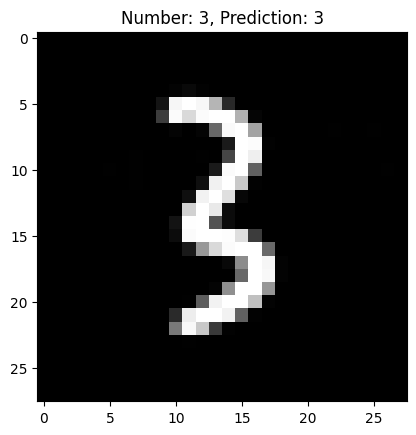

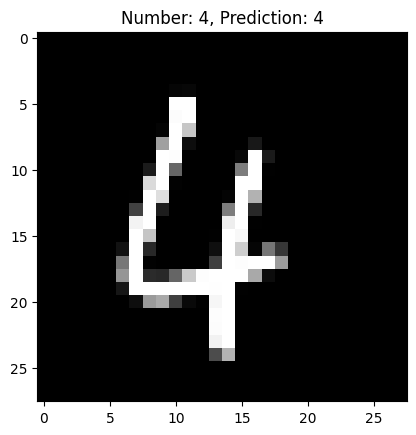

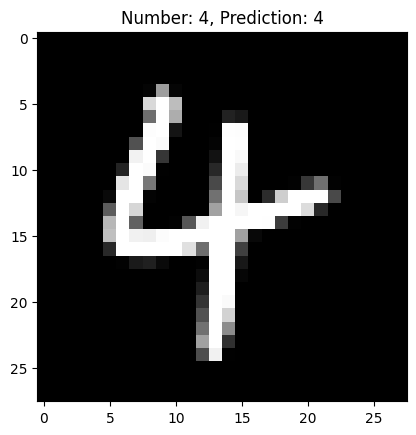

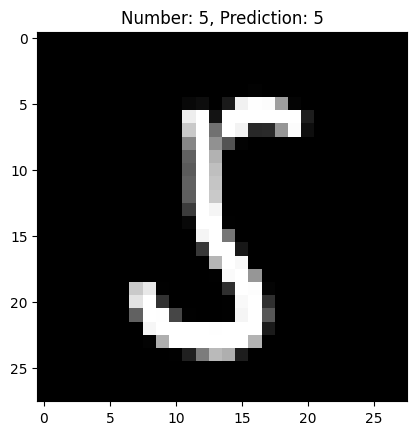

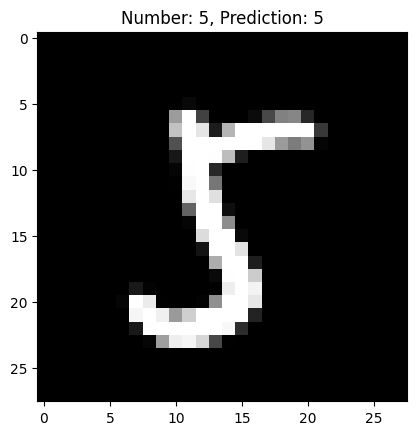

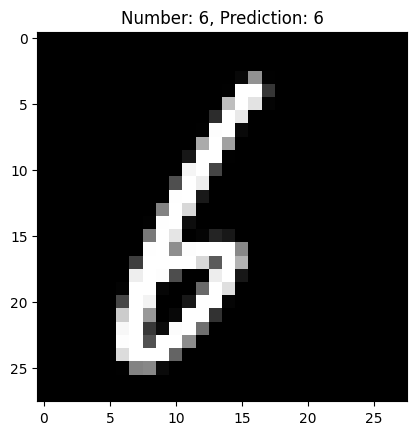

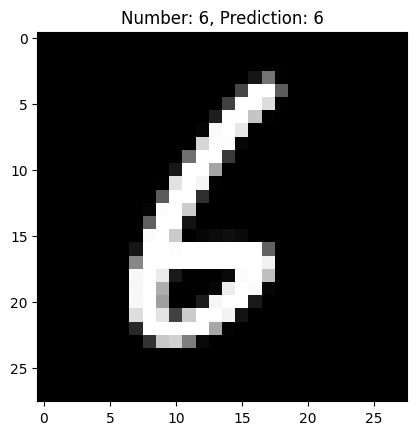

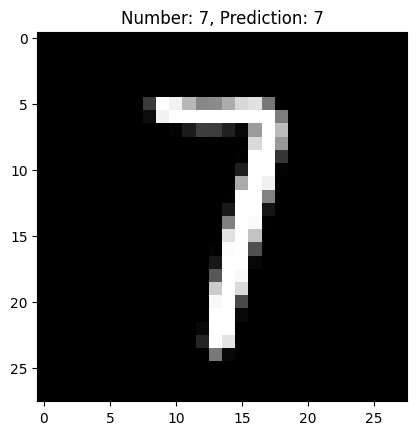

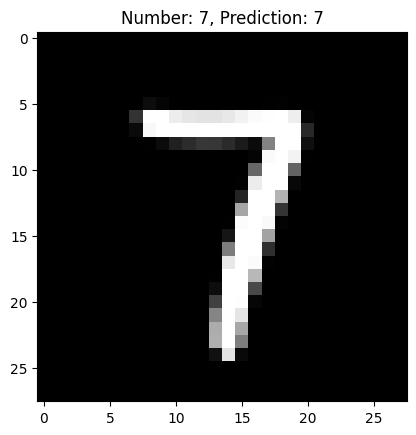

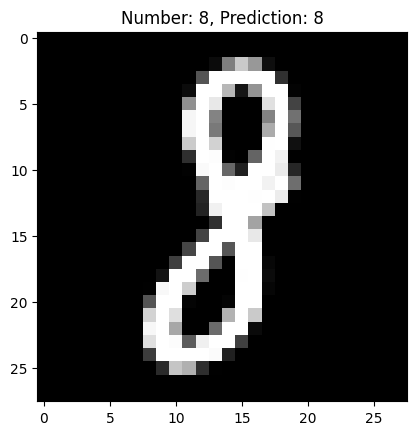

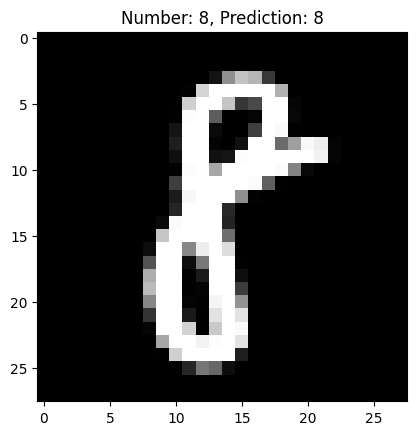

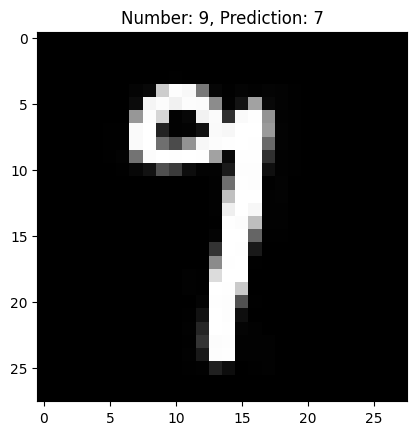

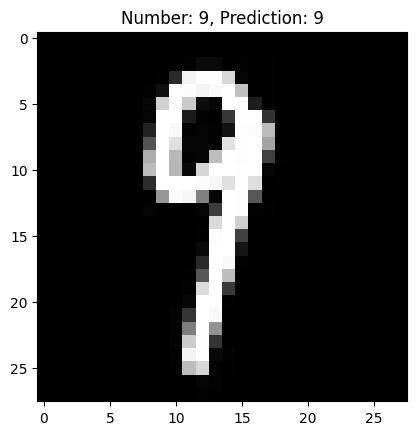

In [24]:
net.eval()
files = os.listdir('./test_imgs/')
results = []
for i in range(len(files)):
    if 'png' in files[i]:
        # load images
        file_name = './test_imgs/' + files[i]
        number = int(files[i].split('.')[0].split('_')[0])
        index = int(files[i].split('.')[0].split('_')[1])
        img = Image.open(file_name)
        img = img.convert('L')
        img_array = np.array(img)
        # turn white background into black as MNIST dataset
        for i in range(28):
            for j in range(28):
                img_array[i, j] = 255 - img_array[i, j]
        img = Image.fromarray(img_array)
        # predict
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        img = ToTensor()(img)
        img = img.to(device)
        img = img.unsqueeze(0)
        output = net(img)
        prob = torch.nn.functional.softmax(output, dim=1)
        prob = torch.autograd.Variable(prob)
        prob = prob.cpu().numpy()
        pred = np.argmax(prob)
    #     print(prob)
    #     print(np.argmax(prob))
        image = torch.squeeze(img, 0)
        image = ToPILImage()(image)

        plt.imshow(image, cmap='gray', interpolation='none')
        plt.title("Number: {}, Prediction: {}".format(number, pred.item()))
        results.append([number, pred.item()])
        plt.show()


In [25]:
results

[[0, 9],
 [0, 0],
 [1, 1],
 [1, 1],
 [2, 2],
 [2, 2],
 [3, 3],
 [3, 3],
 [4, 4],
 [4, 4],
 [5, 5],
 [5, 5],
 [6, 6],
 [6, 6],
 [7, 7],
 [7, 7],
 [8, 8],
 [8, 8],
 [9, 7],
 [9, 9]]